# Numerical Image Recognition Using Neural Networks
### Kavitha Chetana Didugu

#### Reading HDFS5 file (.h5 file)

In [124]:
if __name__ == '__main__':
    # import required libraries
    import h5py as h5
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

In [125]:
# Read H5 file
f = h5.File("SVHN_single_grey1.h5", "r")
    # Get and print the list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)

X_test
X_train
X_val
y_test
y_train
y_val


## Using Test and Train datasets for model building, evaluation and prediction

In [126]:
X_train=f['X_train']
X_test=f['X_test']
y_train=f['y_train']
y_test=f['y_test']
X_val=f['X_val']
y_val=f['y_val']

In [127]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((42000, 32, 32),
 (18000, 32, 32),
 (60000, 32, 32),
 (42000,),
 (18000,),
 (60000,))

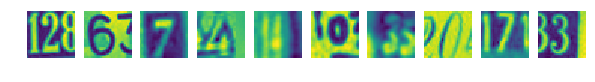

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [128]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

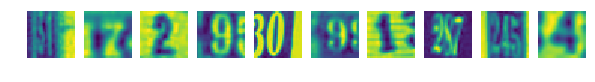

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [129]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32, 32))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

## Data Preprocessing

In [130]:
X_train = np.array(X_train).reshape((X_train.shape[0], -1))
X_test = np.array(X_test).reshape((X_test.shape[0], -1))

### Flattening Image data

In [131]:
X_train.shape, X_test.shape

((42000, 1024), (18000, 1024))

In [132]:
from tensorflow.keras.utils import to_categorical

In [133]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [134]:
y_train.shape, y_test.shape

((42000, 10), (18000, 10))

## Building a Neural Network

In [135]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import BatchNormalization #Conv2D,MaxPooling2D,
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import regularizers

### Layers/Steps involved:
#### 1. Initial layer with glorot normal weight initialisation
#### 2. Batch normalization
#### 3. Activation function (softmax for output layer, relu for all other layers)
#### 4. Dropout process (dropping a fraction of neurons)
#### 5. Regularisation
#### 6. Adaptive Gradient (Adam) optimizer
#### 7. Compiling the neural network model: adam optimizer, categorical cross entropy loss metric, 'accuracy' performance metric


### 1. Model without L1 or L2 regularisation

In [161]:
model = Sequential()
#Input Layer
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='glorot_normal')) #he_normal, lecun_normal
#model.add(Dense(50, input_shape = (1024, ),input_dim=64, kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Intermediate layers
model.add(Dropout(0.2)) #Regularisation through dropout layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Output layer
model.add(Dense(10, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))

    
adam = optimizers.Adam(lr = 0.001)

In [162]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_29 (Batc (None, 50)                200       
_________________________________________________________________
activation_36 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                3264      
_________________________________________________________________
batch_normalization_30 (Batc (None, 64)                256       
_________________________________________________________________
activation_37 (Activation)   (None, 64)              

In [163]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [164]:
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 11s 252us/step - loss: 2.2239 - accuracy: 0.1761
Epoch 2/30
42000/42000 [==============================] - 9s 210us/step - loss: 1.8091 - accuracy: 0.3482
Epoch 3/30
42000/42000 [==============================] - 9s 207us/step - loss: 1.6124 - accuracy: 0.4423
Epoch 4/30
42000/42000 [==============================] - 9s 212us/step - loss: 1.4975 - accuracy: 0.4920
Epoch 5/30
42000/42000 [==============================] - 9s 203us/step - loss: 1.4353 - accuracy: 0.5197
Epoch 6/30
42000/42000 [==============================] - 8s 184us/step - loss: 1.3836 - accuracy: 0.5403
Epoch 7/30
42000/42000 [==============================] - 8s 186us/step - loss: 1.3445 - accuracy: 0.5562
Epoch 8/30
42000/42000 [==============================] - 8s 185us/step - loss: 1.3138 - accuracy: 0.5675
Epoch 9/30
42000/42000 [==============================] - 8s 184us/step - loss: 1.2934 - accuracy: 0.5809
Epoch 10/30
42000/42000 [====================

In [165]:
predicted = np.round(model.predict(X_test),3)

In [166]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 75us/step


In [167]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7074999809265137


### 2. Model with L2 kernel regularisation

In [154]:
model = Sequential()
#Input Layer
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01))) #he_normal, lecun_normal
#model.add(Dense(50, input_shape = (1024, ),input_dim=64, kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Intermediate layers
model.add(Dropout(0.2)) #Regularisation through dropout layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Output layer
model.add(Dense(10, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))

    
adam = optimizers.Adam(lr = 0.001)

In [156]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [157]:
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 9s 217us/step - loss: 2.4828 - accuracy: 0.1842
Epoch 2/30
42000/42000 [==============================] - 8s 184us/step - loss: 2.0066 - accuracy: 0.3120
Epoch 3/30
42000/42000 [==============================] - 8s 186us/step - loss: 1.9296 - accuracy: 0.3571
Epoch 4/30
42000/42000 [==============================] - 8s 196us/step - loss: 1.8891 - accuracy: 0.3764
Epoch 5/30
42000/42000 [==============================] - 8s 199us/step - loss: 1.8663 - accuracy: 0.3893
Epoch 6/30
42000/42000 [==============================] - 9s 212us/step - loss: 1.8464 - accuracy: 0.4016
Epoch 7/30
42000/42000 [==============================] - 8s 189us/step - loss: 1.8318 - accuracy: 0.4068
Epoch 8/30
42000/42000 [==============================] - 8s 191us/step - loss: 1.8139 - accuracy: 0.4193
Epoch 9/30
42000/42000 [==============================] - 8s 182us/step - loss: 1.8067 - accuracy: 0.4219
Epoch 10/30
42000/42000 [=====================

In [158]:
predicted = np.round(model.predict(X_test),3)

In [159]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 74us/step


In [160]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4046666622161865


### Neural network with bias regularizer L2

In [168]:
model = Sequential()
#Input Layer
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='glorot_normal',bias_regularizer=regularizers.l2(0.01))) #he_normal, lecun_normal
#model.add(Dense(50, input_shape = (1024, ),input_dim=64, kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Intermediate layers
model.add(Dropout(0.2)) #Regularisation through dropout layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Output layer
model.add(Dense(10, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))

    
adam = optimizers.Adam(lr = 0.001)

In [169]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [170]:
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 12s 277us/step - loss: 2.2329 - accuracy: 0.1759
Epoch 2/30
42000/42000 [==============================] - 9s 220us/step - loss: 1.8420 - accuracy: 0.3260
Epoch 3/30
42000/42000 [==============================] - 9s 210us/step - loss: 1.6545 - accuracy: 0.4186
Epoch 4/30
42000/42000 [==============================] - 9s 223us/step - loss: 1.5423 - accuracy: 0.4737
Epoch 5/30
42000/42000 [==============================] - 9s 214us/step - loss: 1.4641 - accuracy: 0.5090
Epoch 6/30
42000/42000 [==============================] - 9s 210us/step - loss: 1.4146 - accuracy: 0.5302
Epoch 7/30
42000/42000 [==============================] - 11s 271us/step - loss: 1.3604 - accuracy: 0.5531
Epoch 8/30
42000/42000 [==============================] - 9s 225us/step - loss: 1.3246 - accuracy: 0.5720
Epoch 9/30
42000/42000 [==============================] - 9s 219us/step - loss: 1.3005 - accuracy: 0.5827
Epoch 10/30
42000/42000 [===================

In [171]:
predicted = np.round(model.predict(X_test),3)

In [172]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - ETA:  - 1s 81us/step


In [173]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6967777609825134


### Neural Network with L1 and L2 regularizers

In [174]:
model = Sequential()
#Input Layer
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='glorot_normal',bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))) #he_normal, lecun_normal
#model.add(Dense(50, input_shape = (1024, ),input_dim=64, kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Intermediate layers
model.add(Dropout(0.2)) #Regularisation through dropout layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Output layer
model.add(Dense(10, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))

    
adam = optimizers.Adam(lr = 0.001)

In [175]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [176]:
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 12s 276us/step - loss: 2.2082 - accuracy: 0.1842
Epoch 2/30
42000/42000 [==============================] - 10s 232us/step - loss: 1.7944 - accuracy: 0.3566
Epoch 3/30
42000/42000 [==============================] - 9s 214us/step - loss: 1.6320 - accuracy: 0.4285
Epoch 4/30
42000/42000 [==============================] - 9s 216us/step - loss: 1.5292 - accuracy: 0.4783
Epoch 5/30
42000/42000 [==============================] - 9s 212us/step - loss: 1.4583 - accuracy: 0.5116
Epoch 6/30
42000/42000 [==============================] - 9s 211us/step - loss: 1.4059 - accuracy: 0.5363
Epoch 7/30
42000/42000 [==============================] - 9s 214us/step - loss: 1.3637 - accuracy: 0.5561
Epoch 8/30
42000/42000 [==============================] - 9s 214us/step - loss: 1.3341 - accuracy: 0.5691
Epoch 9/30
42000/42000 [==============================] - 9s 217us/step - loss: 1.3013 - accuracy: 0.5834
Epoch 10/30
42000/42000 [===================

In [177]:
predicted = np.round(model.predict(X_test),3)

In [178]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 89us/step


In [179]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7087777853012085


### Neural Network with L1 and L2 bias regularizers and a different learning rate (0.03)

In [180]:
model = Sequential()
#Input Layer
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='glorot_normal',bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))) #he_normal, lecun_normal
#model.add(Dense(50, input_shape = (1024, ),input_dim=64, kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Intermediate layers
model.add(Dropout(0.2)) #Regularisation through dropout layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Output layer
model.add(Dense(10, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))

    
adam = optimizers.Adam(lr = 0.003)

In [181]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [182]:
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 12s 274us/step - loss: 2.0826 - accuracy: 0.2308
Epoch 2/30
42000/42000 [==============================] - 10s 236us/step - loss: 1.6941 - accuracy: 0.4041
Epoch 3/30
42000/42000 [==============================] - 9s 211us/step - loss: 1.5744 - accuracy: 0.4598
Epoch 4/30
42000/42000 [==============================] - 9s 213us/step - loss: 1.4898 - accuracy: 0.4938
Epoch 5/30
42000/42000 [==============================] - 9s 212us/step - loss: 1.4248 - accuracy: 0.5249
Epoch 6/30
42000/42000 [==============================] - 9s 214us/step - loss: 1.3856 - accuracy: 0.5457
Epoch 7/30
42000/42000 [==============================] - 9s 214us/step - loss: 1.3430 - accuracy: 0.5658
Epoch 8/30
42000/42000 [==============================] - 9s 210us/step - loss: 1.3184 - accuracy: 0.5783
Epoch 9/30
42000/42000 [==============================] - 9s 210us/step - loss: 1.2950 - accuracy: 0.5905
Epoch 10/30
42000/42000 [===================

In [183]:
predicted = np.round(model.predict(X_test),3)

In [184]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 98us/step


In [185]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7412222027778625


### Neural Network with L1 and L2 bias regularizers and a different learning rate (0.05)

In [186]:
model = Sequential()
#Input Layer
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='glorot_normal',bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))) #he_normal, lecun_normal
#model.add(Dense(50, input_shape = (1024, ),input_dim=64, kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Intermediate layers
model.add(Dropout(0.2)) #Regularisation through dropout layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.25))
model.add(Dense(32, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Output layer
model.add(Dense(10, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))

    
adam = optimizers.Adam(lr = 0.005)

In [187]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [188]:
history = model.fit(X_train, y_train, epochs = 30, verbose = 1)

Epoch 1/30
42000/42000 [==============================] - 11s 259us/step - loss: 2.0854 - accuracy: 0.2278
Epoch 2/30
42000/42000 [==============================] - 9s 226us/step - loss: 1.6988 - accuracy: 0.4007
Epoch 3/30
42000/42000 [==============================] - 10s 238us/step - loss: 1.5872 - accuracy: 0.4569
Epoch 4/30
42000/42000 [==============================] - 9s 222us/step - loss: 1.5241 - accuracy: 0.4905
Epoch 5/30
42000/42000 [==============================] - 10s 238us/step - loss: 1.4657 - accuracy: 0.5174
Epoch 6/30
42000/42000 [==============================] - 10s 234us/step - loss: 1.4267 - accuracy: 0.5352
Epoch 7/30
42000/42000 [==============================] - 10s 242us/step - loss: 1.3993 - accuracy: 0.5516
Epoch 8/30
42000/42000 [==============================] - 9s 208us/step - loss: 1.3663 - accuracy: 0.5657
Epoch 9/30
42000/42000 [==============================] - 8s 197us/step - loss: 1.3402 - accuracy: 0.5748
Epoch 10/30
42000/42000 [================

In [189]:
predicted = np.round(model.predict(X_test),3)

In [190]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 123us/step


In [191]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7040555477142334


### Summary: 
#### We see that adding L1 and L2 regularizers has slightly improved the accuracy on the test data
#### Also, increasing the learning rate has significantly (positively) impacted the accuracy up to a point, beyond which accuracy goes down

## KNN Classification Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

### Hyperparameter tuning for KNN Classifier

#### Using Cross Validation methods on the train data to find the optimal KNN classifier

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(5,105,20)}
knn = KNeighborsClassifier(weights='distance')
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [28]:
clf.cv_results_

{'mean_fit_time': array([3.74717895, 3.6890823 , 3.78231414, 3.91078695, 3.67938185]),
 'std_fit_time': array([0.17467653, 0.09868772, 0.19461167, 0.30812777, 0.15085818]),
 'mean_score_time': array([685.2961278 , 712.2078166 , 715.38730709, 740.46449415,
        683.86226845]),
 'std_score_time': array([ 9.06959766, 33.91329482, 22.64129998, 16.66564992,  2.43860848]),
 'param_n_neighbors': masked_array(data=[5, 25, 45, 65, 85],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 25},
  {'n_neighbors': 45},
  {'n_neighbors': 65},
  {'n_neighbors': 85}],
 'split0_test_score': array([0.285     , 0.10771429, 0.06457143, 0.04228571, 0.02964286]),
 'split1_test_score': array([0.29171429, 0.11114286, 0.06028571, 0.03914286, 0.02671429]),
 'split2_test_score': array([0.29014286, 0.11635714, 0.0665    , 0.0435    , 0.0285    ]),
 'mean_test_score': array([0.28895238, 0.1117381 , 0.0637857

In [29]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [30]:
clf.best_estimator_.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')>

In [31]:
predicted=clf.best_estimator_.predict(X_test)

In [33]:
clf.score(X_test,y_test)

0.3244444444444444

In [38]:
predicted, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

In [40]:
print ("Accuracy of KNN Classifier is ", accuracy_score(y_test,predicted))

Accuracy of KNN Classifier is  0.3244444444444444


### Summary: We observe that the Neural Network works better than a fine-tuned KNN in image classification. This indicates the power of neural networks. 
#### Accuracy of  KNN on test data: 0.3244
#### Accuracy of Neural Network on test data: 0.7412 (30 epochs, L1 and L2 regularizer and learning rate of 0.03)